# 9. 비지도 학습
- 훈련 데이터에 레이블이 존재하지 않아 시스템이 아무런 도움 없이 학습해야 하는 학습 방법
- 9장에서 다루는 비지도 학습 알고리즘
    1. 군집 (Clustering)
     - 비슷한 샘플을 **클러스터 (Cluster)**로 모음
     - 데이터 분석, 고객 분류, 추천 시스템, 검색 엔진, 이미지 분할, 준지도 학습, 차원 축소 등에 사용할 수 있는 훌륭한 도구

    2. 이상치 탐지 (Outliner Detection)
     - '정상' 데이터가 어떻게 보이는지를 학습하고 비정상 샘플을 감지하는데 사용
     - 제조 라인에서 결함 제품 감지, 시계열 데이터에서 새로운 트렌드 찾기 등

    3. 밀도 추정 (Density Estimation)
     - 데이터셋 생성 확률 과정의 **확률 밀도 함수 (PDF)**를 추정
     - 밀도 추정은 이상치 탐지에 널리 사용됨
         * 밀도가 매우 낮은 영역에 놓인 샘플이 이상치일 가능성이 높음
     - 데이터 분석과 시각화에도 유용함

## 9.1 군집
- 비슷한 샘플을 구별해 하나의 **클러스터 (Cluster)** 또는 비슷한 샘플의 그룹으로 할당하는 작업
- [그림 9-1]은 붓꽃 데이터셋을 이용한 분류와 군집 알고리즘 비교를 나타냄
    * 왼쪽은 각 샘플의 품종 (클래스)가 구분되어 나타남 (레이블링이 되어있다)
    * 오른쪽은 동일한 데이터셋이지만 레이블이 존재하지 않음
        - 레이블링이 되어있지 않아 분류 알고리즘을 사용할 수 없음
        - 군집 알고리즘을 사용하여 분류해야 함
       
       
- 군집을 사용하는 다양한 애플리케이션
    1. 고객 분류
        - 고객을 구매 이력이나 웹사이트 내 행동 기반으로 클러스터로 모음
        - 고객이 누구인지, 무엇을 원하는지 이해하는데 도움
        - 고객 그룹마다 제품 추천이나 마케팅 전략을 다르게 적용할 수 있음
            * ex. 동일한 클러스터 내의 사용자가 좋아하는 컨텐츠를 추천하는 **추천 시스템**
            
    2. 데이터 분석
        - 새로운 데이터셋을 분석할 때 군집 알고리즘을 실행하고 각 클러스터를 따로 분석하면 도움이 됨
        
    3. 차원 축소 기법
        - 한 데이터셋에 군집 알고리즘을 적용하면 각 클러스터에 대한 샘플의 **친화성 (Affinity)**을 측정할 수 있음
            * 친화성 : 샘플이 클러스터에 얼마나 잘 맞는가?
        - 각 샘플의 특성 벡터 x는 클러스터 친화성의 벡터로 바꿀 수 있음
            - k개의 클러스터가 있다면 이 벡터는 k차원이 됨
            - 일반적으로 원본 특성 벡터보다 훨씬 저차원 
            - 그러나 이후 분석을 위한 충분한 정보를 가질 수 있음
            
    4. 이상치 탐지
        - 모든 클러스터에 친화성이 낮은 샘플은 이상치일 가능성이 높음
        - 웹사이트 내 행동을 기반으로 사용자의 클러스터를 만들었다면 초당 웹서버 요청을 비정상적으로 많이 하는 사용자가 ㅁ지 가능
        - 제조 분야에서 결함을 감지할 때 유용 (또는 **부정 거래 감지**에 활용됨)
        
    5. 준지도 학습
        - 레이블된 샘플이 적다면 군집을 수행하고 동일한 클러스터에 있는 모든 샘플에 레이블을 전파할 수 있음
        - 이어지는 지도 학습 알고리즘에 필요한 레이블이 크게 증가하여 성능을 크게 향상시킴
        
    6. 검색 엔진
        - 제시된 이미지와 비슷한 이미지를 찾는 검색 엔진을 구축하려면 데이터베이스에 있는 모든 이미지에 군집 알고리즘을 적용
            * 비슷한 이미지는 동일한 클러스터에 속함
        - 사용자가 찾으려는 이미지를 제공하면 훈련된 군집 모델을 사용해 이미지의 클러스터를 찾고, 이 클러스터의 모든 이미지를 반환
        
    7. 이미지 분할
        - 색을 기반으로 픽셀을 클러스터로 모은 다음, 각 픽셀의 색을 해당 클러스터의 평균 색으로 바꿈
            * 이미지에 있는 색상의 종류를 크게 줄이게 됨
        - 물체의 윤곽을 감지하기 쉬워 물체 탐지 및 추적 시스템에서 많이 사용함
        
- 클러스터에 대한 보편적인 정의는 없음
    * 실제로 상황에 따라 다름 (알고리즘이 다르면 다른 종류의 클러스터를 감지)
        1. **센트로이드 (Centroid)**라 부르는 특정 포인트를 중심으로 모인 샘플을 찾음
        2. 샘플이 밀집되어 연속된 영역을 찾음
            * 클러스터가 어떤 모양이든 될 수 있음
        3. 계층적으로 클러스터의 클러스터를 찾음
    * 유명한 군집 알고리즘 : k-평균과 DBSCAN
    
### 9.1.1 k-평균
- [그림 9-2]에 있는 레이블 없는 데이터셋 살펴보기
    * 샘플 덩어리 5개를 볼 수 있음
- k-평균은 반복 몇 번으로 이런 종류의 데이터셋을 빠르고 효율적으로 클러스터로 묶을 수 있는 간단한 알고리즘
    * 로이드-포지 알고리즘이라고 부르기도 함
    
- 위의 데이터셋에 k-평균 알고리즘 훈련해보기 
    * 각 클러스터의 중심을 찾고 가장 가까운 클러스터에 샘플 할당

In [14]:
# 예제 데이터 생성
import numpy as np
from sklearn.datasets import make_blobs
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

# k-평균 알고리즘 훈련
from sklearn.cluster import KMeans
k = 5
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(X)

- 알고리즘이 찾을 클러스터 갯수 k를 지정해야 함
    * 이 예제에서는 데이터를 보고 k를 5로 지정해야 한다고 알 수 있음
        - 그러나 일반적으로 쉬운 일이 아님
- 각 샘플은 5개의 클러스터 중 하나에 할당됨
- 군집에서 각 샘플의 **레이블**은 알고리즘이 샘플에 할당한 클러스터의 인덱스
- *KMeans* 클래스의 인스턴스는 *labels_* 인스턴스 변수에 훈련된 샘플의 레이블을 가지고 있음

In [3]:
y_pred

array([4, 2, 1, ..., 0, 1, 2], dtype=int32)

In [4]:
y_pred is kmeans.labels_

True

- 이 알고리즘이 찾은 센트로이드 5개도 확인 가능

In [5]:
kmeans.cluster_centers_

array([[-2.79290307,  2.79641063],
       [ 0.20876306,  2.25551336],
       [-2.80389616,  1.80117999],
       [-1.46679593,  2.28585348],
       [-2.80037642,  1.30082566]])

- 새로운 샘플에 가장 가까운 센트로이드의 클러스터를 할당할 수 있음

In [6]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([1, 1, 0, 0], dtype=int32)

- 클러스터의 결정 경계를 그려보면 보노로이 다이어그램을 얻을 수 있음 (그림 9-3, 센트로이드는 X로 표시)


- **샘플**은 대부분 적절한 클러스터에 잘 할당됨
    * 그러나 몇 개는 레이블이 잘못 부여됨 (특히 왼쪽 위에 있는 클러스터와 가운데 클러스터의 경계 부근)
- k-평균 알고리즘은 클러스터의 크기가 많이 다르면 잘 작동하지 않음
    * 샘플을 클러스터에 할당할 때 센트로이드까지 거리를 고려하는 것이 전부이기 때문
- **하드 군집**이라는 샘플을 하나의 클러스터에 할당하는 것보다 샘플에 점수를 부여하는 것이 유용할 수 있음
    * 이를 **소프트 군집**이라고 함
    * 이 점수는 샘플과 센트로이드 사이의 거리가 될 수 있고, 반대로 가우시안 방사기저 함수와 같은 유사도 점수 (또는 친화성 점수) 가 될 수 있음
- *KMeans* 클래스의 *transform()* 메서드는 샘플과 각 센트로이드 사이의 거리를 반환

In [7]:
kmeans.transform(X_new)

array([[2.9042344 , 0.32995317, 2.81093633, 1.49439034, 2.88633901],
       [5.84739223, 2.80290755, 5.80730058, 4.4759332 , 5.84236351],
       [0.29040966, 3.29399768, 1.21475352, 1.69136631, 1.71086031],
       [0.36159148, 3.21806371, 0.72581411, 1.54808703, 1.21567622]])

- 고차원 데이터셋을 이런 방식으로 변환하면 k-차원 데이터셋이 만들어짐
    * 이러한 변환은 매우 효율적인 비선형 차원 축소 기법이 될 수 있음

#### k-평균 알고리즘
- 센트로이드가 주어진다고 가정했을 때, 데이터셋에 있는 모든 새믈에 가장 가까운 센트로이드의 클러스터 할당 가능
- 반대로 모든 샘플의 레이블이 주어진다면 각 클러스터에 속한 샘플 평균을 계산하여 모든 센트로이드를 쉽게 구할 수 있음
- 하지만 레이블이나 센트로이드가 주어지지 않는 경우에는?
    * 처음에는 센트로이드를 랜덤하게 선정
        - 예: 무작위로 k개의 샘플을 뽑아 그 위치를 센트로이드로 정함
    * 그 다음 샘플에 레이블을 할당하고 센트로이드를 업데이트하는 과정을 반복해 센트로이드에 변화가 없을 때까지 계속함
        - 이 알고리즘은 제한된 횟수 안에 수렴하는걸 보장 -> 무한 반복되지 않음 (일반적으로 이 횟수는 매우 작음)
        - 샘플과 가장 가까운 센트로이드 사이의 평균 제곱 거리가 매 단계마다 작아질 수밖에 없기 때문
- [그림 9-4]에서 이 알고리즘이 작동하는 것을 볼 수 있음
    1. 처음에는 센트로이드를 랜덤하게 초기화 (왼쪽 위)
    2. 그 다음 샘플에 레이블을 할당 (오른쪽 위)
    3. 그 다음 센트로이드를 업데이트 (왼쪽 가운데)
    4. 샘플에 다시 레이블 할당 (오른쪽 가운데)
    5. 반복
    
    * 그림에서 볼 수 있듯 반복 세 번만에 이 알고리즘은 최적으로 보이는 클러스터에 도달

- **NOTE** 이 알고리즘의 계산 복잡도는 일반적으로 샘플 개수 *m*, 클러스터 개수 *k*, 차원 개수 *n*에 선형적
    * 그러나 이는 데이터가 군집할 수 있는 구조를 가질 때이며, 그렇지 않은 경우 최악의 경우 계산 복잡도는 샘플 개수가 지수적으로 급격히 증가할 수 있음
    * 실전에서는 이런 일이 드뭄 (일반적으로 k-평균은 가장 빠른 군집 알고리즘 중 하나임)

- 이 알고리즘이 수렴하는 것이 보장되지만 적절한 솔루션으로 수렴하지 못할 수 있음
    * 즉 지역 최적점으로 수렴하게 될 수도 있음
- 이러한 일의 여부는 센트로이드 초기화에 달려있음
    * [그림 9-5]는 랜덤한 초기화 단계에 운이 없을 때 알고리즘이 수렴할 수 있는 최적이 아닌 솔루션의 두 예시
    
#### 센트로이드 초기화 방법
- 센트로이드 위치를 근사하게 알 수 있다면 (ex. 또 다른 군집 알고리즘을 먼저 실행) *init* 매개변수에 센트로이드 리스트를 담은 넘파이 배열을 지정하고 *n_init*를 1로 설정할 수 있음

In [12]:
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1)

- 또 다른 방법 : 랜덤 초기화를 다르게 하여 여러 번 알고리즘을 실행하고 가장 좋은 솔루션을 선택하는 것
    * 랜덤 초기화 횟수는 *n_init* 매개변수를 조절 (기본값은 10)
        - 이는 *fit()* 메서드를 호출할 때 앞서 설명한 전체 알고리즘이 10번 실행된다는 의미

- Sklearn은 이 중에 최선의 솔루션을 반환함
    * 어떻게 최선의 솔루션을 알 수 있는가?
        - 각 샘플과 가장 가까운 센트로이드 사이의 평균 제곱 거리이며 **모델의 이너셔 (Inertia)**라고 부름

- [그림 9-5]의 왼쪽 모델의 이너셔는 대략 223.3 - 오른쪽 모델의 이너셔는 237.5
    * [그림 9-3]의 모델은 211.6
    
- KMeans 클래스는 알고리즘을 *n_init*번 실행하여 이너셔가 가장 낮은 모델을 반환
    * 랜덤 초기화가 *n_init*번 연속으로 운이 나쁘지 않다면 [그림 9-3]에 있는 모델이 선택됨
        - 이 값이 궁금하면 *inertia_* 인스턴스 변수로 모델의 이너셔를 확인할 수 있음 

In [15]:
kmeans.inertia_

211.59853725816836

- *score()* 메서드는 이너셔의 음숫값을 반환함
    * 음수인 이유 : 예측기의 *score()* 메서드는 사이킷런의 '큰 값이 좋은 것이다'라는 규칙을 따르기 때문
    * 한 예측기가 다른 것보다 좋다면 *score()* 메서드가 더 높은 값을 반환해야 함

In [16]:
kmeans.score(X)

-211.5985372581684

- 데이비드 아서와 세르게이 바실비츠키가 2006년에 k-평균 알고리즘을 향상시킨 *k-평균++ 알고리즘*을 제안
    * 다른 센트로이드와 거리가 먼 센트로이드를 선택하는 똑똑한 초기화 단계를 소개
    * k-평균 알고리즘이 최적이 아닌 솔루션으로 수렴할 가능성을 크게 낮춤
    * 최적의 솔루션을 찾기 위해 실행할 알고리즘 반복 횟수를 크게 줄일 수 있기 때문에 똑똑한 초기화 단계에 드는 추가 계산이 충분한 가치가 있다는 것을 보여줌
        1. 데이터셋에서 무작위로 균등하게 하나의 센트로이드 $c^{(1)}$을 선택
        2. $D(x^{(i)})^2 / \sum^{m}_{j=1} D(x^{(j)})^2$의 확률로 샘플 $x^{(i)}$를 새로운 센트로이드 $c^{(i)}$로 선택
            * $D(x^{(i)})$는 샘플 $x^{(i)}$와 이미 선택된 가장 가까운 센트로이드까지의 거리
            * 이 확률 분포는 이미 선택한 센트로이드에서 멀리 떨어진 샘플을 다음 센트로이드로 선택할 가능성을 높임
        3. k개의 센트로이드가 선택될 때까지 이전 단계를 반복함

- *KMeans* 클래스는 기본적으로 이 초기화 방법을 사용함
    * 원래 방식을 사용하려면? *init* 매개변수를 *"random"으로 지정함

#### k-평균 속도 개선과 미니배치 k-평균
- 2013년 찰스 엘칸의 논문에서 k-평균 알고리즘에 대해 또 다른 중요한 개선 제안
    * 불필요한 거리 계산을 많이 피함으로써 알고리즘의 속도를 상당히 높일 수 있음
    * 이를 위해 삼각 부등식을 사용 (즉 두 점 사이의 직선은 항상 짧은 거리가 됨)
    * 그리고 샘플과 센트로이드 사이의 거리를 위한 하한선과 상한선을 유지함
        - KMeans 클래스에서 이를 기본으로 사용 (원래 알고리즘을 사용하려면 매개변수를 *"full"*로 지종

- 2010년 데이비드 스컬리의 논문에서 k-평균 알고리즘의 또 다른 중요한 변종 제시
    * 전체 데이터셋을 사용해 반복하지 않고 각 반복마다 미니배치를 사용해 센트로이드를 조금씩 이동
        - 알고리즘의 속도를 3배에서 4배 정도로 높임
    * 또한 메모리에 들어가지 않는 대량의 데이터셋에 군집 알고리즘을 적용할 수 있음
    * Sklearn은 *MiniBatchKMeans* 클래스에 이 알고리즘을 구현함
        - *KMeans* 클래스처럼 이 클래스를 사용할 수 있음

In [17]:
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters=5)
minibatch_kmeans.fit(X)

MiniBatchKMeans(n_clusters=5)

- 데이터셋이 메모리에 들어가지 않는 경우
    * 가장 간단한 방법은 8장의 점진적 PCA에서 했던 것처럼 *memmap* 클래스를 사용할 수 있음
    * *MiniBatchKMeans* 클래스의 *paertial_fit()* 메서드에 한번에 하나의 미니 배치를 전달할 수 있음
        - 그러나 초기화를 여러 번 수행하고 만들어진 결과에서 가장 좋은 것을 직접 골라야 해 해야 할 일이 
        
        
- 미니배치 k-평균 알고리즘이 일반 k-평균 알고리즘보다 훨씬 빠르지만 **이너셔**는 일반적으로 조금 더 나쁨
    * 특히 클러스터의 개수가 증가할 때 그러함
    * [그림 9-6]에서 볼 수 있음
        - 왼쪽 그래프 : 여러가지 클러스터 개수 k를 사용해 앞선 데이터셋에서 훈련한 미니배치 k-평균과 일반 k-평균 모델의 이너셔를 비교
            * 두 곡선의 차이는 상당히 일정하게 유지되지만 k가 증가함에 따라 이너셔가 점점 줄어들기 때문에 이 차이가 차지하는 비율은 점점 커짐
        - 오른쪽 그래프 : 미니배치 k-평균이 일반 k-평균보다 훨씬 빠르고 k가 증가함에 따라 더 커지는 것을 볼 수 있음
        
#### 최적의 클러스터 갯수 찾기
- 일반적으로 k를 어떻게 설정할지 쉽게 알 수 없음
    * 만약 올바르게 지정하지 않으면 결과는 매우 나쁠 수 있음
    * [그림 9-7]은 k를 3이나 8로 지정하면 상당히 나쁜 모델이 만들어짐
    
- 가장 작은 이너셔를 가진 모델을 선택하면 되지 않을까?
    * k=3 이너셔 : 653.2
    * k=5 이너셔 : 211.6
    * k=8 이너셔 : 119.1
        - 이너셔는 k가 증가함에 따라 점점 작아지므로 k를 선택할 때 좋은 성능 지표가 아님
        - 실제로 클러스터가 늘어날수록 각 샘플은 가까운 센트로이드에 더 가깝게 됨 (-> 이너셔가 더 작아짐)
    * [그림 9-8]은 이너쇼를 k의 함수로 그래프를 그린 것
        - k가 4까지 증가할 때 빠르게 줄어듬
            * 그러나 k가 계속 증가하면 이너셔는 훨씬 느리게 감소함
            * 그래프를 팔의 형태와 비슷하게 보면 k=4 지점이 엘보
        - k에 대한 정답을 모를때는 4가 좋은 선택이 됨
            * 이보다 작으면 변화가 심하고, 더 큰 값은 크게 도움이 되지 않기 때문
   
- 더 정확한 (하지만 계산 비용이 많이 드는) **실루엣 점수** 사용하여 클러스터 갯수 찾기
    * **실루엣 점수** : 모든 샘플에 대한 **실루엣 계수**의 평균
        - 샘플의 실루엣 계수 : $(b-a) / max(a, b)$로 계산
            * $a$ : 동일한 클러스터에 있는 다른 샘플까지 평균 거리 (클러스터 내부의 평균 거리)
            * $b$ : 가장 가까운 클러스터까지의 평균 거리 (가장 가까운 클러스터의 샘플까지의 평균 거리)
                - 샘플과 가장 가까운 클러스터는 자신이 속한 클러스터를 제외하고 b가 최소인 클러스터
        - 실루엣 계수는 -1에서 +1까지 바뀔 수 있음
            * +1에 가까우면 자신의 클러스터 안에 잘 속해있고 다른 클러스터와는 멀리 떨어져 있다는 뜻
            * 0에 가까우면 클러스터 경계에 위치한다는 의미
            * -1에 가까우면 이 샘플이 잘못된 클러스터에 할당되었다는 의미
    * 계산하려면 Sklearn의 *silhouette_score()* 함수 사용
        - 데이터셋에 있는 모든 샘플과 할당된 레이블 전달

In [18]:
from sklearn.metrics import silhouette_score
silhouette_score(X, kmeans.labels_)

0.655517642572828

- 클러스터의 개수를 달리하여 실루엣 점수 비교하기 (그림 9-9)
    * 이전보다 훨씬 더 많은 정보를 주고 있음
        - k=4가 좋은 선택이지만 k=5도 꽤 좋다는 사실을 잘 보여줌 (k=6이나 7보다 훨씬 좋음)
            * 이너셔를 비교했을 때는 드러나지 않았음

- 모든 샘플의 실루엣 계수를 할당한 클러스터와 계숫값으로 정렬하여 그리면 더 많은 정보가 있는 그래프를 얻을 수 있음
    * 이를 **실루엣 다이어그램**이라고 함 (그림 9-10)
        - 클러스터마다 **칼 모양**의 그래프가 그려짐
            * 높이 : 클러스터가 포함하고 있는 샘플의 개수 의미
            * 너비 : 클러스터에 포함된 샘플의 정렬된 실루엣 계수를 나타냄 (넓을수록 좋음)

### 9.1.3 군집을 사용한 이미지 분할
- **이미지 분할**은 이미지를 세그먼트 여러 개로 분할하는 작업
    * **시맨틱 분할**에서는 동일한 종류의 물체에 속한 모든 픽셀은 같은 세그먼트에 할당됨
        - ex. 자율 주행 자동차의 비전 시스템에서 보행자 이미지를 구성하는 모든 픽셀은 '보행자' 세그먼트에 할당
            * 이 경우 각 보행자는 다른 세그먼트가 될 수 있음 (이런 경우를 '인스턴스 분할' 이라고 부름)
- 시맨틱 또는 인스턴스 분할에서 최고 수준의 성능을 내려면 합성곱 신경망 (14장)을 사용한 복잡한 모델을 사용해야 함
    * 여기서는 훨씬 더 쉬운 작업인 **색상 분할**을 수행함
       - 동일한 색상을 가진 픽셀을 같은 세그먼트에 할당할 것임
    * 어떤 애플리케이션에서는 이 정도로 충분할 수 있음
        - ex. 인공지능 사진을 분석하여 한 지역의 전체 산림 면적이 얼마나 되는지 측정하는 경우


- matplotlib의 *imread()* 함수를 이용해 이미지를 읽어오기 (그림 9-12의 왼쪽 위 이미지)

In [19]:
from matplotlib.image import imread
import os
image = imread(os.path.join("images", "unsupervised_learning", "ladybug.png"))
image.shape

(533, 800, 3)

- 이 이미지는 3D 배열로 표현됨
    * 1차원 : 높이
    * 2차원 : 너비
    * 3차원 : 컬러 채널 갯수
        - 빨강, 초록, 파랑 (RGB) 채널
        - 각 픽셀에 대해 빨강, 초록, 파랑의 강도를 담은 3D 벡터 존재
        - 0.0과 1.0 사이의 값을 가짐 (*imageio.imread()*를 사용하면 0~255)
        - 어떤 이미지는 더 적은 채널을 가지기도 함 (흑백 이미지 (1채널))
        - 혹은 더 많은 채널 (투명도를 위한 알파 채널 or 위성 이미지)을 가지기도 함
            * 위성 이미지는 종종 여러 전자기파에 대한 채널을 포함 (적외선 등)
            
- 이 배열을 RGB 색상의 긴 리스트로 변환한 다음 k-평균을 사용해 이 색상을 클러스터로 모음


In [21]:
X = image.reshape(-1, 3)
kmeans = KMeans(n_clusters=8).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

- 예 : 모든 초록색을 하나의 컬러 클러스터로 만들 수 있음
    * 그 다음 각 색상에 대해 그 픽셀의 컬러 클라스터의 평균 클러스터를 찾음
        - ex. 모든 초록색은 모두 밝은 초록색으로 바뀔 수 있음 (평균 색이 밝은 초록색이라고 가정)
    * 마지막으로 긴 색상 리스트를 원본 이미지와 동일한 크기로 변경

- 이 과정을 통해 [그림 9-12]의 오른쪽 위에 보이는 이미지를 출력할 수 있음
    * 그림처럼 클러스터 개수를 여러 개로 바꿔 테스트할 수 있음
        - 클러스터 개수 < 8 - 무당벌레의 빨간색이 독자적인 클러스터를 만들지 못하고 주위 색에 합쳐짐
            * k-평균이 비슷한 크기의 클러스터를 만드는 경향이 있기 때문
        - 무당벌레는 이미지의 나머지 부분보다 훨씬 작기 때문에 화려한 색을 가지고 있더라도 k-평균이 무당벌레를 하나의 클러스터로 만들지 못함

### 9.1.4 군집을 사용한 전처리
- 군집은 **지도 학습 알고리즘**을 적용하기 전에 **전처리** 단계로 이용할 수 있음
    * 차원 축소에 군집을 사용하는 예를 다뤄보기 위해 숫자 데이터셋 사용
        - MNIST와 비슷한 데이터셋으로 0부터 9까지 숫자를 나타내는 8x8 크기 흑백 이미지 1,797개를 담고 있음

- 데이터셋 불러오기

In [27]:
# 데이터셋 불러오기
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
X_digits, y_digits = load_digits(return_X_y=True)

# 훈련 세트와 테스트 세트로 나누기
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, random_state=42)

# 로지스틱 회귀 모델 훈련
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train, y_train)

# 테스트 세트에서 정확도 평가
log_reg.score(X_test, y_test)

0.9688888888888889

- 기준값으로 96.9% 정확도를 얻음
- k-평균을 전처리 단계로 사용하여 더 좋아지는지 확인
    * 파이프라인을 만들어 훈련 세트를 50개의 클러스터로 모으고, 이미지를 50개 클러스터까지의 거리로 바꿈
    * 그 다음 로지스틱 회귀 모델을 적용

In [28]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=50)),
    ("log_reg", LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42))
])
pipeline.fit(X_train, y_train)

# 분류 파이프라인 평가
pipeline.score(X_test, y_test)

0.9733333333333334

- 약 30%까지 오차율 감소 확인

- 군집이 데이터셋의 차원을 (64에서 50으로) 감소시켰지만 성능 향상은 대부분 변환된 데이터셋이 원본 데이터셋보다 선혈적으로 잘 구분될 수 있기 때문에 이뤄짐
    * 따라서 로지스틱 회귀를 사용하기 더 좋음

- 클러스터 개수 k를 임의로 정함
    * 이보다 더 좋은 결과를 낼 수 있음
    * k-평균이 분류 파이프라인의 하나의 전처리 단계이기 때문에 이전보다 좋은 k값을 찾는 일이 더 쉬움
        - 실루엣 분석이나 이너셔가 감소되는지 확인할 필요 없음
    * 가장 좋은 k값은 교차검증에서 가장 좋은 분류 성능을 내는 값임
        - *GridSearchCV*를 사용하여 최적의 클러스터 개수를 찾을 수 있다

In [29]:
from sklearn.model_selection import GridSearchCV
param_grid = dict(kmeans__n_clusters=range(2, 100))
grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=2)
grid_clf.fit(X_train, y_train)

# 최선의 k값과 이때 파이프라인 성능 확인
grid_clf.best_params_, grid_clf.score(X_test, y_test)

Fitting 3 folds for each of 98 candidates, totalling 294 fits
[CV] END ...............................kmeans__n_clusters=2; total time=   0.1s
[CV] END ...............................kmeans__n_clusters=2; total time=   0.1s
[CV] END ...............................kmeans__n_clusters=2; total time=   0.1s
[CV] END ...............................kmeans__n_clusters=3; total time=   0.1s
[CV] END ...............................kmeans__n_clusters=3; total time=   0.1s
[CV] END ...............................kmeans__n_clusters=3; total time=   0.1s
[CV] END ...............................kmeans__n_clusters=4; total time=   0.2s
[CV] END ...............................kmeans__n_clusters=4; total time=   0.1s
[CV] END ...............................kmeans__n_clusters=4; total time=   0.1s
[CV] END ...............................kmeans__n_clusters=5; total time=   0.2s
[CV] END ...............................kmeans__n_clusters=5; total time=   0.2s
[CV] END ...............................kmeans_

[CV] END ..............................kmeans__n_clusters=35; total time=   3.2s
[CV] END ..............................kmeans__n_clusters=36; total time=   2.9s
[CV] END ..............................kmeans__n_clusters=36; total time=   3.5s
[CV] END ..............................kmeans__n_clusters=36; total time=   3.0s
[CV] END ..............................kmeans__n_clusters=37; total time=   3.3s
[CV] END ..............................kmeans__n_clusters=37; total time=   3.3s
[CV] END ..............................kmeans__n_clusters=37; total time=   3.4s
[CV] END ..............................kmeans__n_clusters=38; total time=   3.6s
[CV] END ..............................kmeans__n_clusters=38; total time=   3.3s
[CV] END ..............................kmeans__n_clusters=38; total time=   3.3s
[CV] END ..............................kmeans__n_clusters=39; total time=   3.2s
[CV] END ..............................kmeans__n_clusters=39; total time=   3.8s
[CV] END ...................

[CV] END ..............................kmeans__n_clusters=69; total time=   4.8s
[CV] END ..............................kmeans__n_clusters=70; total time=   4.0s
[CV] END ..............................kmeans__n_clusters=70; total time=   4.5s
[CV] END ..............................kmeans__n_clusters=70; total time=   4.0s
[CV] END ..............................kmeans__n_clusters=71; total time=   5.7s
[CV] END ..............................kmeans__n_clusters=71; total time=   6.3s
[CV] END ..............................kmeans__n_clusters=71; total time=   3.9s
[CV] END ..............................kmeans__n_clusters=72; total time=   4.3s
[CV] END ..............................kmeans__n_clusters=72; total time=   4.2s
[CV] END ..............................kmeans__n_clusters=72; total time=   3.8s
[CV] END ..............................kmeans__n_clusters=73; total time=   3.6s
[CV] END ..............................kmeans__n_clusters=73; total time=   3.8s
[CV] END ...................

({'kmeans__n_clusters': 82}, 0.9822222222222222)

- k=99개의 클러스터를 사용할 때 정확도가 크게 향삼됨
    * 테스트 세트에서 98.22%를 달성
    * 99가 탐색 범위에서 가장 큰 값이므로 더 높은 k값을 탐색해볼 여지도 있음

### 9.1.5 군집을 사용한 준지도 학습
- 군집을 사용하는 또 다른 사례 -> **준지도 학습**
    * 레이블이 없는 데이터가 많고 레이블이 있는 데이터는 적을 때 사용

- 숫자 데이터셋에서 레이블된 50개 샘플에 로지스틱 회귀 모델 훈련하기

In [30]:
n_labeled = 50
log_reg = LogisticRegression()
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])

# 성능 확인
log_reg.score(X_test, y_test)

/Users/aftermoon/opt/anaconda3/envs/HandsOn-ML/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8266666666666667

- 정확도가 82.6% -> 전체 데이터셋을 사용했을 때보다 낮은 정확도가 나오게 됨
- 어떻게 개선할 수 있는가?
    1. 훈련 세트를 50개의 클러스터로 모음
    2. 그 다음 각 클러스터에서 센트로이드에 가장 가까운 이미지를 찾음
        - 이런 이미지들을 **대표 이미지** 라고 부름

In [38]:
k = 50
kmeans = KMeans(n_clusters=k, random_state=42)
X_digits_dist = kmeans.fit_transform(X_train)
representative_digit_idx = np.argmin(X_digits_dist, axis=0)
X_representative_digits = X_train[representative_digit_idx]

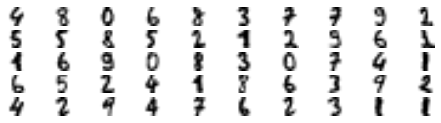

In [39]:
# 이미지 출력 (from Github)
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 2))
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(8, 8), cmap="binary", interpolation="bilinear")
    plt.axis('off')

plt.show()

In [45]:
# 수동으로 레이블 할당
y_representative_digits = np.array([4, 8, 0, 6, 8, 3, 7, 7, 9, 2, 
                                    5, 5, 8, 5, 2, 1, 2, 9, 6, 1, 
                                    1, 6, 9, 0, 8, 3, 0, 7, 4, 1, 
                                    6, 5, 2, 4, 1, 8, 6, 3, 9, 2, 
                                    4, 2, 9, 4, 7, 6, 2, 3, 1, 1])

- 레이블된 50개 샘플로 이루어진 데이터셋이 준비됨
    * 하지만 무작위로 고른 샘플이 아닌 각 클러스터를 대표하는 이미지

- 성능이 조금이라도 높아졌는지 확인

In [46]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)

0.9222222222222223

- 성능이 82.6%에서 92.2%로 높게 상승
    * 샘플에 레이블을 부여하는 것은 비용이 많이 들고 어려움
        - 특히 전문가가 수동으로 처리해야할 때 그러함
    * 따라서 무자구이 샘플 대신 대표 샘플에 레이블을 할당하는 것이 좋은 방법

- 여기서 한 단계 더 나아가 이 레이블을 동일한 클러스터에 있는 모든 샘플로 전파하는 **레이블 전파**

In [48]:
y_train_propagated = np.empty(len(X_train), dtype=np.int32)
for i in range(k):
    y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]
    
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train, y_train_propagated)
log_reg.score(X_test, y_test)

0.9333333333333333

- 성능은 올라갔으나 놀라운 정도는 아님
    * 각 대표 샘플의 레이블을 동일한 클러스터의 모든 샘플에 전파한 것이 문제가 됨
        - 클러스터 경계에 가깝게 위치한 샘플이 포함되어 있어 레이블이 잘못 부여되었을 것임
 
- 센트로이드와 가까운 샘플의 20%에만 레이블을 전파해보고 어떻게 되는지 확인하기

In [52]:
percentile_closest = 20
X_cluster_dist = X_digits_dist[np.arange(len(X_train,)), kmeans.labels_]

for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1
    
partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)
log_reg.score(X_test, y_test)

0.94

- 레이블된 샘플 50개만으로 94.0%의 정확도를 얻음
    * 레이블이 있는 전체 데이터셋에서 훈련한 로지스틱 회귀 성능 (96.9%)에 매우 가까움
- 성능이 좋은 이유 : 전파된 레이블이 실제로 매우 좋기 때문
    * 다음 코드에서 볼 수 있듯 99% 실제 데이터와 같음

In [51]:
np.mean(y_train_partially_propagated == y_train[partially_propagated])

0.9896907216494846

##### 능동 학습
- 모델과 훈련 세트를 지속적으로 향상하기 위해 다음 단계로 **능동 학습**을 몇 번 반복할 수 있음
    * 전문가와 학습 알고리즘이 상호작용하여 알고리즘이 요청할 때 특정 샘플의 레이블을 제공
- 능동 학습에는 여러 다른 학습 전략이 존재하지만, 가장 널리 사용되는 것 중 하나는 **불확실성 샘플링**
    * 작동 방식
        1. 지금까지 수집된 레이블된 샘플에서 모델을 훈련함
            * 이 모델을 사용해 레이블되지 않은 모든 샘플에 대한 예측을 만듬
        2. 모델이 가장 불확실하게 예측한 샘플 (즉 추정 확률이 낮은 샘플)을 전문가에게 보내 레이블을 붙임
        3. 레이블을 부여하는 노력만큼의 성능이 향상되지 않을 때까지 이를 반복
- 다른 방법
    * 모델을 가장 크게 바꾸는 샘플이나 모델의 검증 점수를 가장 크게 떨어뜨리는 샘플, 여러 개의 모델 (SVM, 랜덤 포레스트 등)이 동일한 예측을 내지 않는 샘플에 대해 레이블을 요청

### 9.1.6 DBSCAN
- 밀집된 연속적 지역을 클러스터로 정의
    * 알고리즘이 각 샘플에서 작은 거리인 $\epsilon$ (입실론) 내에 샘플이 몇 개 놓여있는지 셈
        - 이 지역을 샘플의 **$\epsilon$-이웃**이라고 부름
    * (자기 자신을 포함해) $\epsilon$-이웃 내에 적어도 *min_samples*개 샘플이 있다면 이를 **핵심 샘플**로 간주
        - 즉 핵심 샘플 -> 밀집된 지역에 있는 샘플
    * 핵심 샘플의 이웃에 있는 모든 새믈은 동일한 클러스터에 속함
        - 이웃에는 다른 핵심 샘플이 포함될 수 있음
        - 따라서 핵심 샘플의 이웃의 이웃은 계속해서 하나의 클러스터를 형성함
    * 핵심 샘플이 아니고 이웃도 아닌 샘플은 이상치로 판단함

- 이 알고리즘은 모든 클러스터가 충분히 밀집되어 있고 밀집되지 않는 지역과 잘 구분될 때 좋은 성능을 냄
    * Sklearn에 있는 *DBSCAN* 클래스는 사용법이 간단함

- 반달 모양 데이터셋에서 테스트해보기

In [53]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.05)
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.05)

In [54]:
# 모든 샘플의 레이블은 인스턴스 변수 labels_에 저장되어 있음
dbscan.labels_

array([ 0,  1,  2,  1,  0,  0,  1,  2,  0,  0,  1,  3, -1,  3,  3, -1,  1,
        0,  0,  0, -1,  1,  4,  1,  1,  0,  1,  1,  1,  3,  1, -1,  1, -1,
        1,  0,  1,  1,  1,  1,  1,  0,  1, -1,  1,  1,  1,  1,  1,  2,  1,
        0,  0, -1, -1,  1,  1,  3,  0,  1,  0,  1,  3, -1,  1,  0,  4,  4,
        1, -1,  0,  3,  3,  1,  3,  1,  1,  0,  1,  1,  1,  3,  1,  0,  1,
        2,  0,  1,  1,  1,  0,  1,  0,  1,  1,  4,  1,  7,  0,  1,  1,  0,
        2,  1,  1,  0,  1,  3,  1,  0,  0,  0,  0,  1,  2,  1,  1,  3,  1,
        0,  1,  0,  5,  1,  3,  0,  3,  2,  1,  1,  1,  1,  2,  3,  3,  0,
        3,  1, -1,  1,  0,  1,  0,  0,  3,  1,  3,  3,  3,  2, -1,  1,  1,
        0,  0,  1,  0,  1,  0,  0,  3,  1,  0,  3,  1,  0,  0,  1,  2, -1,
       -1,  1,  1,  0,  2,  1,  3,  0,  0,  3,  1,  1,  1, -1,  1,  3,  1,
        0,  1,  1,  0,  0,  1,  1,  3,  3,  1,  5,  0,  3,  1, -1,  5,  3,
        0,  0,  1,  1,  1,  1,  0,  0,  0,  1,  0,  0,  1,  0,  0,  1, -1,
        0,  3,  1,  1, -1

- 일부 샘플의 클러스터 인덱스는 -1
    * 알고리즘이 이 샘플을 이상치로 판단했다는 의미
    * 핵심 샘플의 인덱스는 인스턴스 변수 *core_sample_indices_*에서 확인할 수 있음
    * 핵심 샘플 자체는 인스턴스 변수 *components_*에 저장되어 있음

In [55]:
len(dbscan.core_sample_indices_)

793

In [56]:
dbscan.components_

array([[ 1.85497292, -0.03728811],
       [-0.96855909,  0.45038058],
       [ 2.00542971,  0.41302753],
       ...,
       [ 0.95205999,  0.26788396],
       [ 1.29083913, -0.45525327],
       [ 0.47756861, -0.35646177]])

- 이 군집 결과가 [그림 9-14] 왼쪽 그래프에 있음
    * 그림에서 볼 수 있듯 클러스터를 7개 만들었으며 많는 샘플을 이상치 (X)로 판단
    * 다행히 *eps*를 0.2로 증가해 샘플의 이웃 범위를 넓히면 오른쪽 그래프처럼 완벽한 군집을 이룸
        - 이 모델로 계속 진행
        

- *DBSCAN* 클래스는 *predict()* 메서드를 제공하지 않고 *fit_predict()* 메서드를 제공
    - 새로운 샘플에 대해 클러스터를 예측할 수 없음을 의미
        * 이러한 구현 결정은 다른 분류 알고리즘이 이런 작업을 더 잘 수행할 수 있기 때문
              - 그러므로 사용자가 필요한 예측기룰 수행해야 함
              - 구현도 어렵지 않음
- ex. KNeighborClassifier 훈련

In [57]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(n_neighbors=50)

In [58]:
# 샘플 몇 개를 전달해 어떤 클러스터에 속할 가능성이 높은지 예측하고 각 클러스터에 대한 확률 추정
X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
knn.predict(X_new), knn.predict_proba(X_new)

(array([1, 3, 1, 0]),
 array([[0.  , 0.76, 0.  , 0.24, 0.  , 0.  , 0.  , 0.  ],
        [0.  , 0.04, 0.  , 0.86, 0.  , 0.  , 0.1 , 0.  ],
        [0.22, 0.42, 0.06, 0.  , 0.2 , 0.1 , 0.  , 0.  ],
        [1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]]))

- 분류기를 핵심 샘플에서만 훈련헀지만 모든 샘플에서 훈련하거나 이상치를 제외할 수도 있음
    * 선택은 최종 작업의 성능에 따라 결정

- 이 결정 경계가 [그림 9-15]에 나타남
    * 덧셈 기호는 X_new에 있는 샘플 4개를 표시
    * 훈련세트에 이상치가 없기 때문에 클러스터가 멀리 떨어져 있더라도 분류기는 항상 클러스터 한 개를 선택함
    * 최대 거리를 사용하면 두 클러스터에서 멀리 떨어진 샘플을 이상치로 간단히 분류 가능
        - *KNeighborsClassifier* 의 *kneighbors()* 메서드를 사용함
            * 이 메서드에 샘플을 전달하면 훈련 세트에서 가장 가까운 k개 이웃의 거리와 인덱스를 반환 (k개 열을 가진 행렬 2개를 반환)

In [60]:
y_dist, y_pred_idx = knn.kneighbors(X_new, n_neighbors=1)
y_pred = dbscan.labels_[dbscan.core_sample_indices_][y_pred_idx]
y_pred[y_dist > 0.2] = -1
y_pred.ravel()

array([-1,  6,  5, -1])

- DBSCAN은 매우 간단하지만 강력한 알고리즘
    * 클러스터의 모양과 개수에 상관없이 감지할 수 있는 능력이 있음
    * 이상치에 안정적이고 하이퍼파라미터가 2개 (*eps*, *min_samples*)
    * 그러나 클러스터 간의 밀집도가 크게 다르면 모든 클러스터를 올바르게 잡아내는 것이 불가능함
    * 계산 복잡도 : $O(m log m)$
        - 샘플 개수에 대해 거의 선형적으로 증가
        - 그러나 Sklearn의 구현은 *eps*가 커지면 $O(m^2)$만큼 메모리가 필요함

#### 9.1.7 다른 군집 알고리즘
##### 1. 병합 군집
- 클러스터 계층을 밑바닥부터 위로 쌓아 구성
    * 물 위를 떠다니는 작은 방울들이 점차 붙어 나중에는 하나의 커다란 방울이 되는 것과 유사함
- 반복마다 병합 군집이 인접한 클러스터 쌍을 연결 (처음에는 샘플 1개에서 시작)
- 병합된 클러스터 쌍을 트리로 모두 그리면 클러스터의 이진 트리를 얻을 수 있음
    * 이 트리의 리프는 개별 샘플임
- 대규모 샘플과 클러스터에 잘 확장되며 다양한 형태의 클러스터를 감지할 수 있음
- 특정 클러스터 개수를 선택하는데 도움이 되는 유용한 클러스터 트리를 만들 수 있음
    * 이는 어떤 짝 거리 (두 클러스터 간의 거리?) 와도 사용할 수 있음
- 이웃한 샘플 간의 거리를 담은 $m\times m$ 크기 희소 행렬을 연결 행렬로 전달하는 식으로 대규모 샘플에도 잘 적용할 수 있음
    * *sklearn.neighbors.kneighbors_graph()* 함수가 반환한 값 사용
- 연결 행렬이 없으면 대규모 데이터셋으로 확장하기 어려움
 

##### 2. BIRCH (Balanced Iterative Reducing and Clustering using Hierachies)
- 대규모 데이터셋을 위해 특별히 고안된 알고리즘
- 특성 개수가 너무 많지 않다면 (20개 이하) 배치 k-평균보다 빠르고 비슷한 결과를 만듬
- 훈련 과정에서 새로운 샘플을 클러스터에 빠르게 할당할 수 있는 정보를 담은 트리 구조를 만듬
- 이 트리에 모든 샘플을 저장하지 않기 때문에 제한된 메모리를 사용해 대용량 데이터셋을 다룰 수 있음

##### 3. 평균-이동
- 먼저 각 샘플을 중심으로 하는 원을 그림
- 그 다음 원마다 안에 포함된 모든 샘플의 평균을 구함
- 그리고 원의 중심을 평균점으로 이동시킴
- 모든 점이 움직이지 않을 때까지 평균-이동을 계속함
    * 원의 중심이 포함된 샘플의 평균점일 때까지 지속
- 평균-이동은 지역의 **최대 밀도**를 찾을 때까지 높은 쪽으로 원을 이동시킴
    * 동일한 지역에 (또는 충분히 가깝게) 안착한 원에 있는 모든 샘플은 동일한 클러스터가 됨
- DBSCAN과 유사한 특징 존재
    1. 모양이나 개수에 상관 없이 클러스터를 찾을 수 있음
    2. 하이퍼파라미터도 매우 적음 (**Bandwidth**라고 부르는 원 반경 1개)
    3. 국부적인 밀집도 추정에 의존
- 그러나 DBSCAN과 달리 평균-이동은 클러스터 내부 밀집도가 불균형할 때 여러개로 나누는 경향이 있음
- 계산 복잡도는 $O(m^2)$임
    * 대규모 데이터셋에는 적합하지 않음

##### 4. 유사도 전파
- 투표 방식을 사용
    * 샘플은 자신을 대표할 수 있는 비슷한 샘플에 투표함
- 알고리즘이 수렴하면 각 대표와 투표한 샘플이 클러스터를 형성
- 크기가 다른 여러개의 클러스터를 감지할 수 있음
- 계산 복잡도는 $O(m^2)$임
    * 대규모 데이터셋에는 적합하지 않음

##### 5. 스펙트럼 군집
- 샘플 사이의 유사도 행렬을 받아 저차원 임베딩을 만듬 (-> 차원 축소)
- 그 다음 이 저차원 공간에서 또 다른 군집 알고리즘 사용
    * Sklearn의 구현에서는 k-평균을 사용
- 복잡한 클러스터 구조를 감지하고 그래프 컷을 찾는 데 사용할 수 있음
    * ex. 소셜 네트워크에서 친구의 클러스터를 찾음
- 샘플 갯수가 많으면 잘 적용되지 않고 클러스터의 크기가 매우 다르면 잘 동작하지 않음

## Next -> 밀집도 추정, 군집, 이상치 탐지에 사용할 수 있는 가우시안 혼합 모델